In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the dataset
df = pd.read_excel('1.xlsx')  # Replace with your file path


In [3]:
# Define a function to calculate the survival months
def calculate_survival_months(row):
    start_date = row['설립일자']
    end_date = row['폐업일'] if pd.notnull(row['폐업일']) else datetime.now()
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month


In [4]:
# Apply the function to the dataframe
df['생존 기간(개월)'] = df.apply(calculate_survival_months, axis=1)

In [5]:
# Separate the data into platform and non-platform companies
platform_companies = df[df['플랫폼 여부'] == '플랫폼']
non_platform_companies = df[df['플랫폼 여부'] == '비플랫폼']


In [6]:
# Correct the data type for '폐업여부' column to be boolean for calculations
platform_companies['폐업여부'] = platform_companies['폐업여부'] == '폐업자'
non_platform_companies['폐업여부'] = non_platform_companies['폐업여부'] == '폐업자'


C:\Users\User\AppData\Local\Temp\ipykernel_19088\431830962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_companies['폐업여부'] = platform_companies['폐업여부'] == '폐업자'
C:\Users\User\AppData\Local\Temp\ipykernel_19088\431830962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_platform_companies['폐업여부'] = non_platform_companies['폐업여부'] == '폐업자'


In [7]:
# Define a function to calculate the Kaplan-Meier survival estimator
def kaplan_meier_estimator(data):
    data_sorted = data.sort_values(by='생존 기간(개월)')
    times = data_sorted['생존 기간(개월)'].unique()
    survival_prob = [1]
    for time in times:
        at_risk = data_sorted[data_sorted['생존 기간(개월)'] >= time].shape[0]
        events = data_sorted[data_sorted['생존 기간(개월)'] == time]['폐업여부'].sum()
        survival_prob.append(survival_prob[-1] * (1 - events / at_risk))
    return times, survival_prob[1:]

In [8]:
# Calculate survival curves
times_platform, survival_prob_platform = kaplan_meier_estimator(platform_companies)
times_non_platform, survival_prob_non_platform = kaplan_meier_estimator(non_platform_companies)


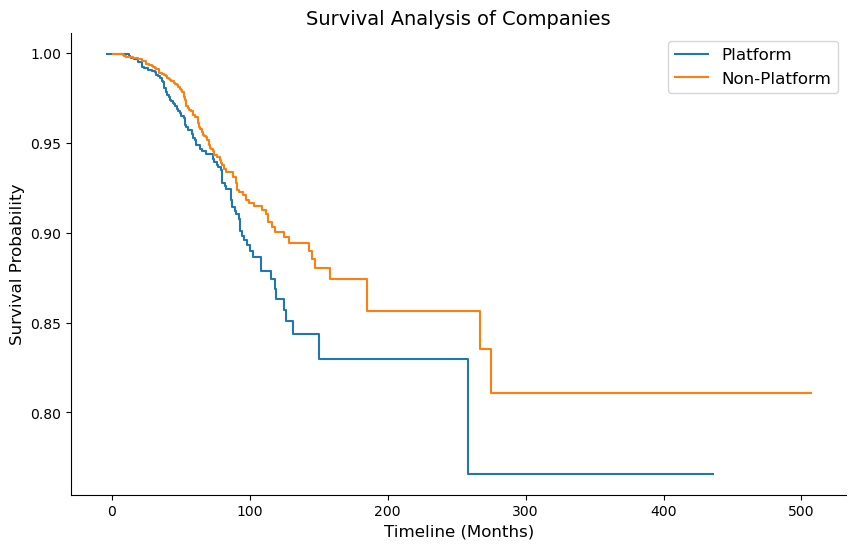

In [9]:
# Plot the survival curves
plt.figure(figsize=(10, 6))
plt.step(times_platform, survival_prob_platform, where="post", label='Platform')
plt.step(times_non_platform, survival_prob_non_platform, where="post", label='Non-Platform')

plt.title('Survival Analysis of Companies', fontsize=14)
plt.xlabel('Timeline (Months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.legend(fontsize=12)
sns.despine()